In [4]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

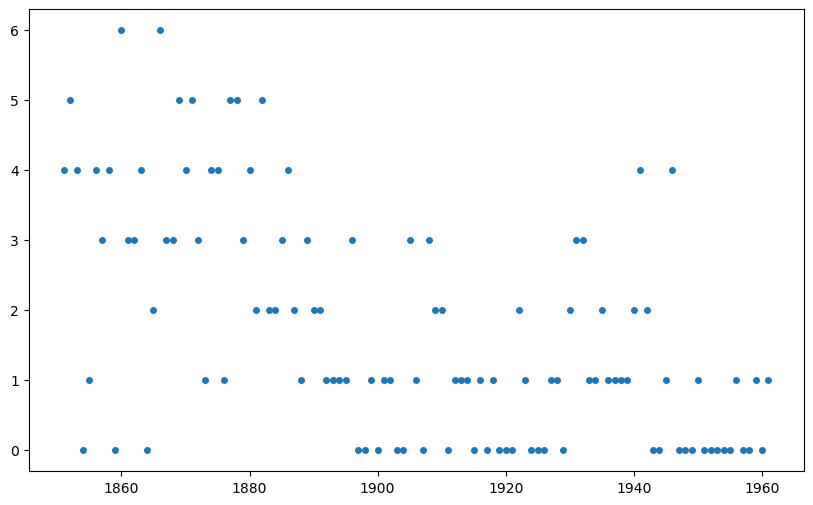

In [6]:
data = np.loadtxt("gibbs_coal.csv", delimiter=",",skiprows=1)
plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 1], 'o', markersize=4, label='Data')

The model will be a Poission distribution with rate parameter $\lambda_1$ if $t<= n$ and $\lambda_2$ if $t>n$. The model is given by:
$$
\begin{align*}
D_t \sim \begin{cases}
 \text{Poisson}(\lambda_1) & \text{if } t \leq n \\
 \text{Poisson}(\lambda_2) & \text{if } t > n
\end{cases}
\end{align*}
$$

We aim to determine the posterior for $n$, $\lambda_1$, and $\lambda_2$ given the observed data $D_t$.
We will use a conjugate prior for the Poisson distribution, which is a gamma distribution. $\Gamma(a, b)$  

From this we can write down the full unnormalized posterior (noting that the prior on n is uniform so drops out in the unnormalized posterior):
$$
\begin{align*}
p(n, \lambda_1, \lambda_2 | D) &\propto p(D | n, \lambda_1, \lambda_2) p(n) p(\lambda_1) p(\lambda_2) \\
&= \prod_{t=1}^n \frac{\lambda_1^{D_t} e^{-\lambda_1}}{D_t!} \prod_{t=n+1}^{N} \frac{\lambda_2^{D_t} e^{-\lambda_2}}{D_t!} \Gamma(\lambda_1; a, b) \Gamma(\lambda_2; a, b) \\    
\end{align*}
$$

Expanding the gamma distribution and dropping normalization constants, we have:

$$
\begin{align*}
p(n, \lambda_1, \lambda_2 | D) &\propto \prod_{t=1}^n \lambda_1^{D_t} e^{-\lambda_1}  \prod_{t=n+1}^{N}  \lambda_2^{D_t} e^{-\lambda_2} \Gamma(\lambda_1; a, b) \Gamma(\lambda_2; a, b) \\
&= \prod_{t=1}^n \lambda_1^{D_t} e^{-\lambda_1} \prod_{t=n+1}^{N} \lambda_2^{D_t} e^{-\lambda_2}  \lambda_1^{a-1} e^{-b\lambda_1}  \lambda_2^{a-1} e^{-b\lambda_2} \\
&= \lambda_1^{\sum_{t=1}^n D_t + a - 1} e^{-(b+n)\lambda_1} \lambda_2^{\sum_{t=n+1}^{N} D_t + a - 1} e^{-(b+(N-n)\lambda_2} \\
&= \Gamma(\lambda_1; \sum_{t=1}^n D_t + a, b+n) \times \Gamma(\lambda_2; \sum_{t=n+1}^{N} D_t + a, b+(N-n)) \\
\end{align*}


From this we can read off the conditional posterior distributions for $\lambda_1$ and $\lambda_2$, but we need to also determine the conditional posterior for $n$.  We can proceed by first gathering all the terms that only depend on $n$:

$$
\begin{align*}
p(n | D, \lambda_1, \lambda_2) &\propto  \lambda_1^{\sum_{t=1}^n D_t} e^{-n \lambda_1} \lambda_2^{\sum_{t=n+1}^{N} D_t} e^{-(N-n) \lambda_2} \\
\end{align*}
$$

We can normalize this by summing over all possible values of $n$ when we do this in the Gibbs sampler